# pandas Foundations

Pandas DataFrames are the most widely used in-memory representation of complex data collections within Python. Whether in finance, scientific fields, or data science, a familiarity with Pandas is essential. This course teaches you to work with real-world data sets containing both string and numeric data, often structured around time series. You will learn powerful analysis, selection, and visualization techniques in this course.

## 1. Data ingestion & inspection

In this chapter, you will be introduced to Panda's DataFrames. You will use Pandas to import and inspect a variety of datasets, ranging from population data obtained from The World Bank to monthly stock data obtained via Yahoo! Finance. You will also practice building DataFrames from scratch, and become familiar with Pandas' intrinsic data visualization capabilities.

### 1.1 Inspecting your data
You can use the DataFrame methods `.head()` and `.tail()` to view the first few and last few rows of a DataFrame. In this exercise, we have imported pandas as `pd` and loaded population data from 1960 to 2014 as a DataFrame `df`. This dataset was obtained from the [World Bank](http://databank.worldbank.org/data/reports.aspx?source=2&type=metadata&series=SP.URB.TOTL.IN.ZS#).

Your job is to use `df.head()` and `df.tail()` to verify that the first and last rows match a file on disk. In later exercises, you will see how to extract values from DataFrames with indexing, but for now, manually copy/paste or type values into assignment statements where needed. Select the correct answer for the first and last values in the `'Year'` and `'Total Population'` columns.

**Instructions**

**Possible Answers**  
- First: 1980, 26183676.0; Last: 2000, 35.  
- **First: 1960, 92495902.0; Last: 2014, 15245855.0.**  
- First: 40.472, 2001; Last: 44.5, 1880.  
- First: CSS, 104170.0; Last: USA, 95.203.  

In [1]:
import pandas as pd

df = pd.read_csv('./Data/world_ind_pop_data.csv')

In [2]:
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [3]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


### 1.2 DataFrame data types
Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and `NaN` ('Not-a-Number') types which often indicate missing data. In this exercise, we have imported pandas as `pd` and read in the world population data which contains some `NaN` values, a value often used as a place-holder for missing or otherwise invalid data entries. Your job is to use `df.info()` to determine information about the total count of `non-null` entries and infer the total count of 'null' entries, which likely indicates missing data. Select the best description of this data set from the following:

**Instructions**

**Possible Answers**  
- The data is all of type float64 and none of it is missing.
- The data is of mixed type, and 9914 of it is missing.
- **The data is of mixed type, and 3460 float64s are missing.**
- The data is all of type float64, and 3460 float64s are missing.

In [4]:
df.info()
# in our data set nothing is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


### 1.3 NumPy and pandas working together
Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute `.values` to represent a DataFrame `df` as a NumPy array. You can also pass pandas data structures to NumPy methods. In this exercise, we have imported pandas as `pd` and loaded world population data every 10 years since 1960 into the DataFrame `df`. This dataset was derived from the one used in the previous exercise.

Your job is to extract the values and store them in an array using the attribute `.values`. You'll then use those values as input into the NumPy `np.log10()` method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy `np.log10()` method and compare the results.

**Instructions**

- Import `numpy` using the standard alias `np`.
- Assign the numerical values in the DataFrame `df` to an array `np_vals` using the attribute `values`.
- Pass `np_vals` into the NumPy method `log10()` and store the results in `np_vals_log10`.
- Pass the entire `df` DataFrame into the NumPy method `log10()` and store the results in `df_log10`.
- Inspect the output of the `print()` code to see the `type()` of the variables that you created.

In [5]:
df = pd.read_csv('./Data/world_population.csv')

# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

*Wonderful work! As a data scientist, you'll frequently interact with NumPy arrays, pandas Series, and pandas DataFrames, and you'll leverage a variety of NumPy and pandas methods to perform your desired computations. Understanding how NumPy and pandas work together will prove to be very useful.*

### 1.4 Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. `list_keys` contains the column names `'Country'` and `'Total'`. `list_values` contains the full names of each country and the number of gold medals awarded. The values have been taken from [Wikipedia](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table).

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the `list()`, `zip()`, `dict()` and `pd.DataFrame()` functions. Pandas has already been imported as `pd`.

Note: The [zip()](https://docs.python.org/3/library/functions.html#zip) function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this `zip` object into a list, you'll need to use `list()`. You can learn more about the `zip()` function as well as generators in [Python Data Science Toolbox (Part 2)](https://www.datacamp.com/courses/python-data-science-toolbox-part-2).

**Instructions**

- Zip the 2 lists `list_keys` and `list_values` together into one list of (key, value) tuples. Be sure to convert the `zip` object into a list, and store the result in `zipped`.
- Inspect the contents of `zipped` using `print()`. This has been done for you.
- Construct a dictionary using `zipped`. Store the result as `data`.
- Construct a DataFrame using the dictionary. Store the result as `df`.

In [6]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)



[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


### 1.5 Labeling your data
You can use the DataFrame attribute `df.columns` to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we have imported pandas as `pd` and defined a DataFrame `df` containing top Billboard hits from the 1980s (from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1980s#1980)). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels `a, b, c, d`. Your job is to use the `df.columns` attribute to re-assign descriptive column labels.

**Instructions**

- Create a list of new column labels with `'year'`, `'artist'`, `'song'`, `'chart weeks'`, and assign it to `list_labels`.
- Assign your list of labels to `df.columns`.

In [7]:
data = {'a':[1980, 1981, 1982]
      , 'b':['Blondie', 'Chistorpher Cross', 'Chistorpher Cross']
      , 'c':['Call Me', 'Arthurs Theme', 'I Love Rock and Roll']
      , 'd':[6,3,7]} 
df = pd.DataFrame(data)

# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Chistorpher Cross,I Love Rock and Roll,7


### 1.6 Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list `cities`.

Your job is to construct a DataFrame from the list of cities and the string `'PA'`.

**Instructions**

- Make a string object with the value `'PA'` and assign it to `state`.
- Construct a dictionary with 2 key:value pairs: `'state':state` and `'city':cities`.
- Construct a pandas DataFrame from the dictionary you created and assign it to `df`.

In [8]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana'
          , 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs',
          'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock'
          , 'Pittsburgh', 'Lemasters', 'Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


### 1.7 Reading a flat file
In previous exercises, we have preloaded the data for you using the pandas function `read_csv()`. Now, it's your turn! Your job is to read the World Bank population data you saw earlier into a DataFrame using `read_csv()`. The file is available in the variable `data_file`.

The next step is to reread the same file, but simultaneously rename the columns using the `names` keyword input parameter, set equal to a list of new column labels. You will also need to set `header=0` to rename the column labels.

Finish up by inspecting the result with `df.head()` and `df.info()` in the IPython Shell (changing `df` to the name of your DataFrame variable).

`pandas` has already been imported and is available in the workspace as `pd`.

**Instructions**

- Use `pd.read_csv()` with the string `data_file` to read the CSV file into a DataFrame and assign it to `df1`.
- Create a list of new column labels - `'year'`, `'population'` - and assign it to the variable `new_labels`.
- Reread the same file, again using `pd.read_csv()`, but this time, add the keyword arguments `header=0` and `names=new_labels`. Assign the resulting DataFrame to `df2`.
- Print both the `df1` and `df2` DataFrames to see the change in column names. This has already been done for you.

In [9]:
data_file = './Data/world_population.csv'

# Read in the file: df1
df1 = pd.read_csv(data_file)

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv(data_file, header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


### 1.8 Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from [Yahoo Finance](http://finance.yahoo.com/). The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable `file_messy`.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Your job is to use pandas to read the data from this problematic `file_messy` using non-default input options with `read_csv()` so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable `file_clean` that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using `help()` on the pandas function `pd.read_csv()`.

**Instructions**

- Use `pd.read_csv()` without using any keyword arguments to read `file_messy` into a pandas DataFrame `df1`.
- Use `.head()` to print the first 5 rows of `df1` and see how messy it is. Do this in the IPython Shell first so you can see how modifying `read_csv()` can clean up this mess.
- Using the keyword arguments `delimiter=' '`, `header=3` and `comment='#'`, use `pd.read_csv()` again to read `file_messy` into a new DataFrame `df2`.
- Print the output of `df2.head()` to verify the file was read correctly.
- Use the DataFrame method `.to_csv()` to save the DataFrame `df2` to the variable `file_clean`. Be sure to specify `index=False`.
- Use the DataFrame method `.to_excel()` to save the DataFrame `df2` to the file `'file_clean.xlsx'`. Again, remember to specify `index=False`.

In [10]:
# (base) C:\>activate datacamp
# (datacamp) C:\>conda install openpyxl
#

file_messy = './Data/messy_stock_data.tsv'
file_clean = './Data/tmp_clean_stock_data.csv'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('./Data/file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

### 1.9 Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame df which contains the data you need. Your job is to use the DataFrame method `df.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

The pandas `.plot()` method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Before plotting, inspect the DataFrame in the IPython Shell using `df.head()`. Also, use `type(df)` and note that it is a single column DataFrame.

**Instructions**

- Create the plot with the DataFrame method `df.plot()`. Specify a `color` of `'red'`.
- Note: `c` and `color` are interchangeable as parameters here, but we ask you to be explicit and specify `color`.
- Use `plt.title()` to give the plot a title of `'Temperature in Austin'`.
- Use `plt.xlabel()` to give the plot an x-axis label of `'Hours since midnight August 1, 2010'`.
- Use `plt.ylabel()` to give the plot a y-axis label of `'Temperature (degrees F)'`.
- Finally, display the plot using `plt.show()`.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./Data/weather_data_austin_2010.csv', usecols=['Temperature'])

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

### 1.20 Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling `df.plot()` will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame `df[column_list]` to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots. You can cycle through them by clicking on the 'Previous Plot' and 'Next Plot' buttons.

As in the previous exercise, inspect the DataFrame `df` in the IPython Shell using the `.head()` and `.info()` methods.

**Instructions**

- Plot all columns together on one figure by calling `df.plot()`, and noting the vertical scaling problem.
- Plot all columns as subplots. To do so, you need to specify `subplots=True` inside `.plot()`.
- Plot a single column of dew point data. To do this, define a column list containing a single column name `'Dew Point (deg F)'`, and call `df[column_list1].plot()`.
- Plot two columns of data, `'Temperature (deg F)'` and `'Dew Point (deg F)'`. To do this, define a list containing those column names and pass it into `df[]`, as `df[column_list2].plot()`.

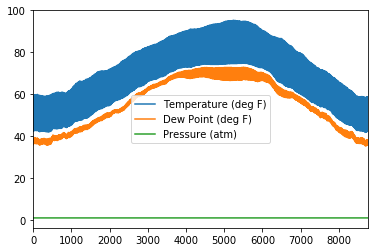

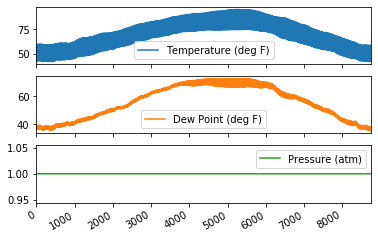

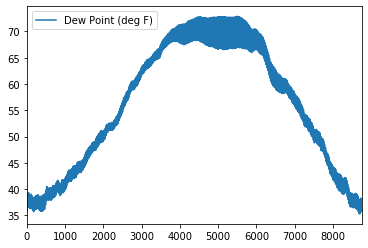

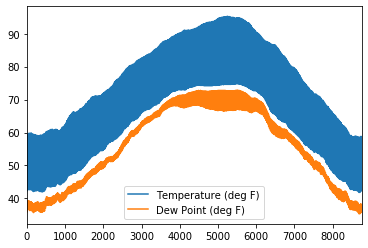

In [12]:
df = pd.read_csv('./Data/weather_data_austin_2010.csv')
df.columns = ['Temperature (deg F)', 'Dew Point (deg F)','Pressure (atm)','Date']

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()

## 2. Exploratory data analysis

Having learned how to ingest and inspect your data, you will next explore it visually as well as quantitatively. This process, known as exploratory data analysis (EDA), is a crucial component of any data science project. Pandas has powerful methods that help with statistical and visual EDA. In this chapter, you will learn how and when to apply these techniques.

### 2.1 pandas line plots
In the previous chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance](http://finance.yahoo.com/). Your job is to plot the `'Month'` column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as `df`. Explore it using methods such as `.head()`, `.info()`, and `.describe()` to see the column names.

**Instructions**

- Create a list of y-axis column names called y_columns consisting of `'AAPL'` and `'IBM'`.
- Generate a line plot with `x='Month'` and `y=y_columns` as inputs.
- Give the plot a title of `'Monthly stock prices'`.
- Specify the y-axis label.
- Display the plot.

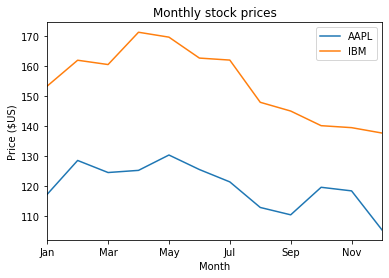

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
file = './Data/stock_data.csv'
df = pd.read_csv(file)

# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

*Wonderful work! It looks like the monthly stock prices of both AAPL and IBM peaked early in the year before falling.*

### 2.2 pandas scatter plots
Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the `x` and `y` columns be chosen by specifying the x and y parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized `'weight'` of each automobile in the dataset.

All necessary modules have been imported and the DataFrame is available in the workspace as `df`.

**Instructions**

- Generate a scatter plot with `'hp'` on the x-axis and `'mpg'` on the y-axis. Specify `s=sizes`.
- Add a title to the plot.
- Specify the x-axis and y-axis labels.

In [14]:
import numpy as np
sizes = np.array([ 51.12044694,  56.78387977,  49.15557238,  49.06977358,
        49.52823321,  78.4595872 ,  78.93021696,  77.41479205,
        81.52541106,  61.71459825,  52.85646225,  54.23007578,
        58.89427963,  39.65137852,  23.42587473,  33.41639502,
        32.03903011,  27.8650165 ,  18.88972581,  14.0196956 ,
        29.72619722,  24.58549713,  23.48516821,  20.77938954,
        29.19459189,  88.67676838,  79.72987328,  79.94866084,
        93.23005042,  18.88972581,  21.34122243,  20.6679223 ,
        28.88670381,  49.24144612,  46.14174741,  45.39631334,
        45.01218186,  73.76057586,  82.96880195,  71.84547684,
        69.85320595, 102.22421043,  93.78252358, 110.        ,
        36.52889673,  24.14234281,  44.84805372,  41.02504618,
        20.51976563,  18.765772  ,  17.9095202 ,  17.75442285,
        13.08832041,  10.83266174,  14.00441945,  15.91328975,
        21.60597587,  18.8188451 ,  21.15311208,  24.14234281,
        20.63083317,  76.05635059,  80.05816704,  71.18975117,
        70.98330444,  56.13992036,  89.36985382,  84.38736544,
        82.6716892 ,  81.4149056 ,  22.60363518,  63.06844313,
        69.92143863,  76.76982089,  69.2066568 ,  35.81711267,
        26.25184749,  36.94940537,  19.95069229,  23.88237331,
        21.79608472,  26.1474042 ,  19.49759118,  18.36136808,
        69.98970461,  56.13992036,  66.21810474,  68.02351436,
        59.39644014, 102.10046481,  82.96880195,  79.25686195,
        74.74521151,  93.34830013, 102.05923292,  60.7883734 ,
        40.55589449,  44.7388015 ,  36.11079464,  37.9986264 ,
        35.11233175,  15.83199594, 103.96451839, 100.21241654,
        90.18186347,  84.27493641,  32.38645967,  21.62494928,
        24.00218436,  23.56434276,  18.78345471,  22.21725537,
        25.44271071,  21.36007926,  69.37650986,  76.19877818,
        14.51292942,  19.38962134,  27.75740889,  34.24717407,
        48.10262495,  29.459795  ,  32.80584831,  55.89556844,
        40.06360581,  35.03982309,  46.33599903,  15.83199594,
        25.01226779,  14.03498009,  26.90404245,  59.52231336,
        54.92349014,  54.35035315,  71.39649768,  91.93424995,
        82.70879915,  89.56285636,  75.45251972,  20.50128352,
        16.04379287,  22.02531454,  11.32159874,  16.70430249,
        18.80114574,  18.50153068,  21.00322336,  25.79385418,
        23.80266582,  16.65430211,  44.35746794,  49.815853  ,
        49.04119063,  41.52318884,  90.72524338,  82.07906251,
        84.23747672,  90.29816462,  63.55551901,  63.23059357,
        57.92740995,  59.64831981,  38.45278922,  43.19643409,
        41.81296121,  19.62393488,  28.99647648,  35.35456858,
        27.97283229,  30.39744886,  20.57526193,  26.96758278,
        37.07354237,  15.62160631,  42.92863291,  30.21771564,
        36.40567571,  36.11079464,  29.70395123,  13.41514444,
        25.27829944,  20.51976563,  27.54281821,  21.17188565,
        20.18836167,  73.97101962,  73.09614831,  65.35749368,
        73.97101962,  43.51889468,  46.80945169,  37.77255674,
        39.6256851 ,  17.24230306,  19.49759118,  15.62160631,
        13.41514444,  55.49963323,  53.18333207,  55.31736854,
        42.44868923,  13.86730874,  16.48817545,  19.33574884,
        27.3931002 ,  41.31307817,  64.63368105,  44.52069676,
        35.74387954,  60.75655952,  79.87569835,  68.46177648,
        62.35745431,  58.70651902,  17.41217694,  19.33574884,
        13.86730874,  22.02531454,  15.75091031,  62.68013142,
        68.63071356,  71.36201911,  76.80558184,  51.58836621,
        48.84134317,  54.86301837,  51.73502816,  74.14661842,
        72.22648148,  77.88228247,  78.24284811,  15.67003285,
        31.25845963,  21.36007926,  31.60164234,  17.51450098,
        17.92679488,  16.40542438,  19.96892459,  32.99310928,
        28.14577056,  30.80379718,  16.40542438,  13.48998471,
        16.40542438,  17.84050478,  13.48998471,  47.1451025 ,
        58.08281541,  53.06435374,  52.02897659,  41.44433489,
        36.60292926,  30.80379718,  48.98404972,  42.90189859,
        47.56635225,  39.24128299,  54.56115914,  48.41447259,
        48.84134317,  49.41341845,  42.76835191,  69.30854366,
        19.33574884,  27.28640858,  22.02531454,  20.70504474,
        26.33555201,  31.37264569,  33.93740821,  24.08222494,
        33.34566004,  41.05118927,  32.52595611,  48.41447259,
        16.48817545,  18.97851406,  43.84255439,  37.22278157,
        34.77459916,  44.38465193,  47.00510227,  61.39441929,
        57.77221268,  65.12675249,  61.07507305,  79.14790534,
        68.42801405,  54.10993164,  64.63368105,  15.42864956,
        16.24054679,  15.26876826,  29.68171358,  51.88189829,
        63.32798377,  42.36896092,  48.6988448 ,  20.15170555,
        19.24612787,  16.98905358,  18.88972581,  29.68171358,
        28.03762169,  30.35246559,  27.20120517,  19.13885751,
        16.12562794,  18.71277385,  16.9722369 ,  29.85984799,
        34.29495526,  37.54716158,  47.59450219,  19.93246832,
        30.60028577,  26.90404245,  24.66650366,  21.36007926,
        18.5366546 ,  32.64243213,  18.5366546 ,  18.09999962,
        22.70075058,  36.23351603,  43.97776651,  14.24983724,
        19.15671509,  14.17291518,  35.25757392,  24.38356372,
        26.02234705,  21.83420642,  25.81458463,  28.90864169,
        28.58044785,  30.91715052,  23.6833544 ,  12.82391671,
        14.63757021,  12.89709155,  17.75442285,  16.24054679,
        17.49742615,  16.40542438,  20.42743834,  17.41217694,
        23.58415722,  19.96892459,  20.33531923,  22.99334585,
        28.47146626,  28.90864169,  43.43816712,  41.57579979,
        35.01567018,  35.74387954,  48.5565546 ,  57.77221268,
        38.98605581,  49.98882458,  28.25412762,  29.01845599,
        23.88237331,  27.60710798,  26.54539622,  31.14448175,
        34.17556473,  16.3228815 ,  17.0732619 ,  16.15842026,
        18.80114574,  18.80114574,  19.42557798,  20.2434083 ,
        20.98452475,  16.07650192,  16.07650192,  16.57113469,
        36.11079464,  37.84783835,  27.82194848,  33.46359332,
        29.5706502 ,  23.38638738,  36.23351603,  32.40968826,
        18.88972581,  21.92965639,  28.68963762,  30.80379718])

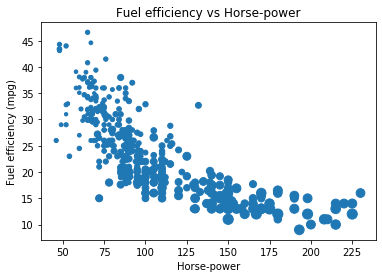

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./Data/auto-mpg.csv')

# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)
#df.plot(kind='scatter', x='hp', y='mpg')

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### 2.3 pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify `subplots=True` inside `.plot()` to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as `df`.

**Instructions**

- Make a list called `cols` of the column names to be plotted: `'weight'` and `'mpg'`.
- Call plot on `df[cols]` to generate a box plot of the two columns in a single figure. To do this, specify `subplots=True`.

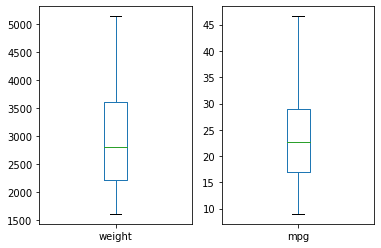

In [16]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### 2.4 pandas hist, pdf and cdf
Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Your job is to plot a PDF and CDF for the `fraction` column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify `normed=True` in your call to `.hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to `normed=True`.

All necessary modules have been imported and the tips dataset is available in the workspace as `df`. Also, some formatting code has been written so that the plots you generate will appear on separate rows.

**Instructions**

- Plot a PDF for the values in `fraction` with 30 `bins` between 0 and 30%. The range has been taken care of for you. `ax=axes[0]` means that this plot will appear in the first row.
- Plot a CDF for the values in `fraction` with 30 `bins` between 0 and 30%. Again, the range has been specified for you. To make the CDF appear on the second row, you need to specify `ax=axes[1]`.

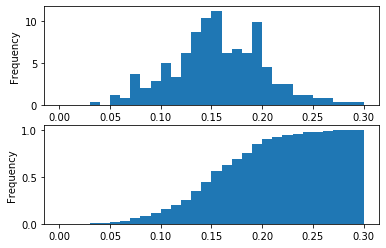

In [17]:
df = pd.read_csv('./Data/tips.csv')
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))
#plt.show()

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, density=True, cumulative=True, range=(0,.3))
plt.show()

#### 2.5 Fuel efficiency
From the automobiles data set, which value corresponds to the median value of the `'mpg'` column? Your job is to select the `'mpg'` column and call the `.median()` method on it. The automobile DataFrame has been provided as `df`.

In [18]:
df = pd.read_csv('./Data/auto-mpg.csv')
df.median()

mpg         22.75
cyl          4.00
displ      151.00
hp          93.50
weight    2803.50
accel       15.50
yr          76.00
dtype: float64

### 2.6 Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp).

Your job is to compute the minimum and maximum values of the `'Engineering'` column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the `.mean()` method with the keyword argument `axis='columns'`. This computes the mean across all columns per row.

The DataFrame has been pre-loaded for you as `df` with the index set to `'Year'`.

**Instructions**

- Print the minimum value of the `'Engineering'` column.
- Print the maximum value of the `'Engineering'` column.
- Construct the mean percentage per year with `.mean(axis='columns')`. Assign the result to `mean`.
- Plot the average percentage per year. Since `'Year'` is the index of `df`, it will appear on the x-axis of the plot. No keyword arguments are needed in your call to `.plot()`.

0.8
19.0


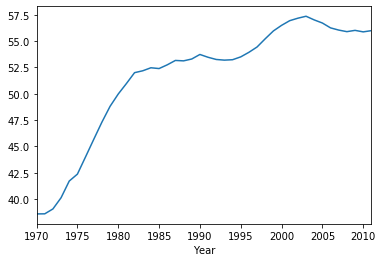

In [19]:
df = pd.read_csv('./Data/percent-bachelors-degrees-women-usa.csv'
                 , index_col='Year')

# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### 2.7 Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

All necessary modules have been imported and the DataFrame is available in the workspace as `df`.

**Instructions**

- Print summary statistics of the `'fare'` column of df with `.describe()` and `print()`. Note: `df.fare` and `df['fare']` are equivalent.
- Generate a box plot of the `'fare'` column.

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


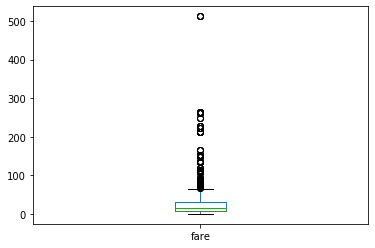

In [20]:
df = pd.read_csv('./Data/titanic.csv')

# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()

### 2.8 Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from [Gapminder](https://docs.google.com/a/continuum.io/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html#).

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

The dataset has been pre-loaded into a DataFrame called `df`.

**Instructions**

- Print the number of countries reported in 2015. To do this, use the `.count()` method on the `'2015'` column of `df`.
- Print the 5th and 95th percentiles of `df`. To do this, use the `.quantile()` method with the list `[0.05, 0.95]`.
- Generate a box plot using the list of columns provided in `years`. This has already been done for you, so click on 'Submit Answer' to view the result!

208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

      ...   2007   2008    2009    2010   2011    2012    2013   2014    2015  \
0.05  ...  53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87  57.855   
0.95  ...  80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00  82.100   

         2016  
0.05  59.2555  
0.95  82.1650  

[2 rows x 218 columns]


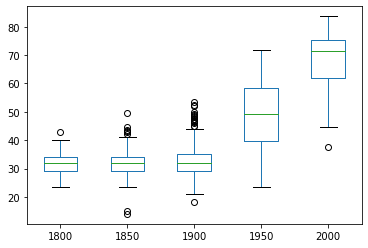

In [21]:
df = pd.read_csv('./Data/life_expectancy_at_birth.csv')

# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

### 2.9 Standard deviation of temperature
Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from [Weather Underground](https://www.wunderground.com/history/).

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

The DataFrames have been pre-loaded for you as january, which contains the `January` data, and march, which contains the `March` data.

**Instructions**

- Compute and print the means of the January and March data using the `.mean()` method.
- Compute and print the standard deviations of the January and March data using the `.std()` method.

In [22]:
january = pd.read_csv('./Data/weather_january.csv')
march = pd.read_csv('./Data/weather_march.csv')

In [23]:

# Print the mean of the January and March data
print(january.mean(), march.mean())

# Print the standard deviation of the January and March data
print(january.std(), march.std())

Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


### 2.10 Filtering and counting
How many automobiles were manufactured in Asia in the automobile dataset? The DataFrame has been provided for you as `df`. Use filtering and the `.count()` member method to determine the number of rows where the `'origin'` column has the value `'Asia'`.

- As an example, you can extract the rows that contain `'US'` as the country of origin using `df[df['origin'] == 'US']`.

In [24]:
df = pd.read_csv('./Data/auto-mpg.csv')

df[df['origin'] == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

### 2.11 Separate and summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

All necessary modules have been imported and the DataFrame has been pre-loaded as `df`.

**Instructions**

- Compute the global mean and global standard deviations of `df` using the `.mean()` and `.std()` methods. Assign the results to `global_mean` and `global_std`.
- Filter the `'US'` population from the `'origin'` column and assign the result to `us`.
- Compute the US mean and US standard deviations of `us` using the `.mean()` and `.std()` methods. Assign the results to `us_mean` and `us_std`.
- Print the differences between `us_mean` and `global_mean` and `us_std` and `global_std`. This has already been done for you.

In [25]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df.origin=='US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


### 2.12 Separate and plot
Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the `'fare'` column and passenger class information is contained in the `'pclass'` column.

When you're done, notice the portions of the box plots that differ and those that are similar.

The DataFrame has been pre-loaded for you as `titanic`.

**Instructions**

- Inside `plt.subplots()`, specify the `nrows` and `ncols` parameters so that there are 3 rows and 1 column.
- Filter the rows where the `'pclass'` column has the values `1` and generate a box plot of the `'fare'` column.

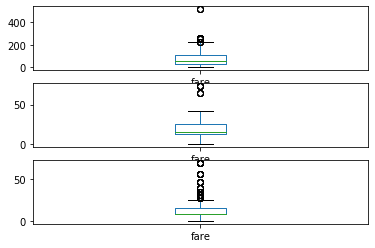

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv('./Data/titanic.csv')

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

### 3. Time series in pandas

In this chapter, you will learn how to manipulate and visualize time series data using Pandas. You will become familiar with concepts such as upsampling, downsampling, and interpolation. You will practice using Pandas' method chaining to efficiently filter your data and perform time series analyses. From stock prices to flight timings, time series data are found in a wide variety of domains and being able to effectively work with such data can be an invaluable skill.

### 3.1 Reading and slicing times
For this exercise, we have read in the same data file using three different approaches:

* df1 = pd.read_csv(filename)

* df2 = pd.read_csv(filename, parse_dates=['Date'])

* df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)

Use the .head() and .info() methods in the IPython Shell to inspect the DataFrames. Then, try to index each DataFrame with a datetime string. Which of the resulting DataFrames allows you to easily index and slice data by dates using, for example, `df1.loc['2010-Aug-01']`?

In [27]:
df3 = pd.read_csv('./Data/weather_data_austin_2010.csv'
                  , index_col='Date'
                  , parse_dates=True)
df3.loc['2010-Aug-01']

,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0
2010-08-01 05:00:00,74.6,71.3,1.0
2010-08-01 06:00:00,74.5,71.3,1.0
2010-08-01 07:00:00,76.0,72.3,1.0
2010-08-01 08:00:00,79.8,72.8,1.0


### 3.2 Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the `pd.to_datetime()` function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a `format` specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as temperature_list and `date_list` respectively. Your job is to use the `.to_datetime()` method to build a `DatetimeIndex` out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

**Instructions**

- Prepare a format string, `time_format`, using `'%Y-%m-%d %H:%M'` as the desired format.
- Convert `date_list` into a datetime object by using the `pd.to_datetime()` function. Specify the format string you defined above and assign the result to `my_datetimes`.
- Construct a pandas Series called time_series using `pd.Series()` with `temperature_list` and `my_datetimes`. Set the `index` of the Series to be `my_datetimes`.

In [28]:
temperature_list = df3.Temperature.tolist()
date_list = df3.index.tolist()

# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

### 3.3 Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the `parse_dates=True` option in `read_csv()` with `index_col="Dates"` so that the Index is indeed a `DatetimeIndex`.

All data from the `'Temperature'` column has been extracted into the variable `ts0`. Your job is to use a variety of natural date strings to extract one or more values from `ts0`.

After you are done, you will have three new variables - `ts1`, `ts2`, and `ts3`. You can slice these further to extract only the first and last entries of each. Try doing this after your submission for more practice.

**Instructions**

- Extract data from `ts0` for a single hour - the hour from 9pm to 10pm on `2010-10-11`. Assign it to `ts1`.
- Extract data from `ts0` for a single day - `July 4th, 2010` - and assign it to `ts2`.
- Extract data from `ts0` for the second half of December 2010 - `12/15/2010` to `12/31/2010`. Assign it to `ts3`.

In [29]:
ts0 = df3.Temperature
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


### 3.4 Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with `NaN` by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, `ts1`, includes weekends, but the second, `ts2`, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

**Instructions**

- Create a new time series `ts3` by reindexing `ts2` with the index of `ts1`. To do this, call `.reindex()` on `ts2` and pass in the index of `ts1` `(ts1.index)`.
- Create another new time series, `ts4`, by calling the same `.reindex()` as above, but also specifiying a fill method, using the keyword argument `method="ffill"` to forward-fill values.
- Add `ts1 + ts2`. Assign the result to `sum12`.
- Add `ts1 + ts3`. Assign the result to `sum13`.
- Add `ts1 + ts4`, Assign the result to `sum14`.

In [30]:
ts1 = pd.Series(data = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],index = 
['2016-07-01','2016-07-02','2016-07-03','2016-07-04','2016-07-05'
 ,'2016-07-06','2016-07-07','2016-07-08','2016-07-09','2016-07-10'
 ,'2016-07-11','2016-07-12','2016-07-13','2016-07-14','2016-07-15',
'2016-07-16','2016-07-17'])
                   
ts2 = pd.Series(data = [0,1,2,3,4,5,6,7,8,9,10],index = 
['2016-07-01','2016-07-04','2016-07-05' ,'2016-07-06','2016-07-07'
 ,'2016-07-08','2016-07-11','2016-07-12','2016-07-13','2016-07-14'
 ,'2016-07-15'])

In [31]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method="ffill")

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

### 3.5 Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - `df.method1().method2().method3()` - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`.

In this exercise, a data set containing hourly temperature data has been pre-loaded for you. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

**Instructions**

- Downsample the `'Temperature'` column of `df` to 6 hour data using `.resample('6h')` and `.mean()`. Assign the result to `df1`.
- Downsample the `'Temperature'` column of `df` to daily data using `.resample('D')` and then count the number of data points in each day with `.count()`. Assign the result `df2`.

In [32]:
df = pd.read_csv('./Data/weather_data_austin_2010.csv'
                  , index_col='Date'
                  , parse_dates=True)

In [33]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()

In [34]:
df1.head(10)


Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
2010-01-02 06:00:00    46.350000
2010-01-02 12:00:00    58.366667
2010-01-02 18:00:00    49.950000
2010-01-03 00:00:00    44.783333
2010-01-03 06:00:00    46.483333
Freq: 6H, Name: Temperature, dtype: float64

In [35]:
df2.head(10)

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
2010-01-06    24
2010-01-07    24
2010-01-08    24
2010-01-09    24
2010-01-10    24
Freq: D, Name: Temperature, dtype: int64

### 3.6 Separating and resampling
With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods. The DataFrame is available in the workspace as `df`. You will be working with the `'Temperature'` column.

**Instructions**

- Use partial string indexing to extract temperature data for August 2010 into `august`.
- Use the temperature data for August and downsample to find the daily maximum temperatures. Store the result in `august_highs`.
- Use partial string indexing to extract temperature data for February 2010 into `february`.
- Use the temperature data for February and downsample to find the daily minimum temperatures. Store the result in `february_lows`.

In [36]:
# Extract temperature data for August: august
august = df['Temperature']['2010-August']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature']['2010-February']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

february_lows

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47.4
2010-02-20    47.7
2010-02-21    47.6
2010-02-22    47.7
2010-02-23    47.7
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64

### 3.7 Rolling mean and frequency
In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them [here](https://en.wikipedia.org/wiki/Moving_average).

To use the `.rolling()` method, you must always use method chaining, first calling `.rolling()` and then chaining an aggregation method after it. For example, with a Series hourly_data, `hourly_data.rolling(window=24).mean()` would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of `.rolling()` and `.mean()`. You will work with the same DataFrame `df` from the previous exercise.

**Instructions**

- Use partial string indexing to extract temperature data from August 1 2010 to August 15 2010. Assign to `unsmoothed`.
- Use `.rolling()` with a 24 hour window to smooth the mean temperature data. Assign the result to `smoothed`.
- Use a dictionary to create a new DataFrame `august` with the time series `smoothed` and `unsmoothed` as columns.
- Plot both the columns of `august` as line plots using the `.plot()` method.

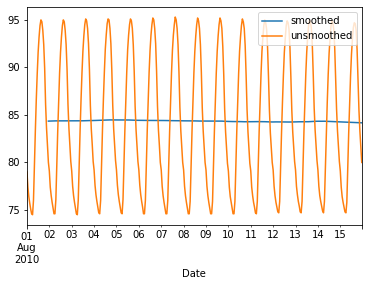

In [37]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
#unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']
unsmoothed = df['Temperature']['1-August-2010':'15-August-2010']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

### 3.8 Resample and roll with it
As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a `groupby` (If you do not know what a `groupby` is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

**Instructions**

- Use partial string indexing to extract August 2010 temperature data, and assign to `august`.
- Resample to daily frequency, saving the maximum daily temperatures, and assign the result to `daily_highs`.
- As part of one long method chain, repeat the above resampling (or you can re-use `daily_highs`) and then combine it with `.rolling()` to apply a 7 day `.mean()` (with `window=7` inside `.rolling()`) so as to smooth the daily highs. Assign the result to `daily_highs_smoothed` and print the result.

In [38]:
# Extract the August 2010 data: august
august = df['Temperature']['August-2010']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7 ).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


### 3.9 Method chaining and filtering
We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In this exercise, a DataFrame containing flight departure data for a single airline and a single airport for the month of July 2015 has been pre-loaded. Your job is to use `.str()` filtering and method chaining to generate summary statistics on flight delays each day to Dallas.

**Instructions**

- Use `.str.strip()` to strip extra whitespace from `df.columns`. Assign the result back to `df.columns`.
- In the `'Destination Airport'` column, extract all entries where Dallas (`'DAL'`) is the destination airport. Use `.str.contains('DAL')` for this and store the result in `dallas`.
- Resample `dallas` such that you get the total number of departures each day. Store the result in `daily_departures`.
- Generate summary statistics for daily Dallas departures using `.describe()`. Store the result in `stats`.

In [39]:
df = pd.read_csv('./data/austin_airport_departure_data_2015_july.csv'
                 , skiprows= 15
                 , index_col = 'Date (MM/DD/YYYY)'
                 , parse_dates = True)

In [40]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### 3.10 Missing values and interpolation
One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. The pre-loaded data `ts1` has value for all times, yet the data set `ts2` does not: it is missing data for the weekends.

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

**Instructions**

- Replace the index of `ts2` with that of `ts1`, and then fill in the missing values of `ts2` by using `.interpolate(how='linear')`. Save the result as `ts2_interp`.
- Compute the difference between `ts1` and `ts2_interp`. Take the absolute value of the difference with `np.abs()`, and assign the result to `differences`.
- Generate and print summary statistics of the `differences` with `.describe()` and `print()`.

In [41]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1-ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


### 3.11 Time zones and conversion
Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles (`'LAX'`) as the destination airport.

Here we will use a mask to ensure that we only compute on data we actually want. To learn more about Boolean masks, click [here](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)!

**Instructions**

- Create a Boolean mask, `mask`, such that if the `'Destination Airport'` column of `df` equals `'LAX'`, the result is `True`, and otherwise, it is `False`.
- Use the mask to filter for only the `LAX` rows. Assign the result to `la`.
- Concatenate the two columns `la['Date (MM/DD/YYYY)']` and `la['Wheels-off Time']` with a `' '` space in between. Pass this to `pd.to_datetime()` to create a datetime array of all the times the LAX-bound flights left the ground.
- Use `Series.dt.tz_localize()` to localize the time to `'US/Central'`.
- Use the `.dt.tz_convert()` method to convert datetimes from `'US/Central'` to `'US/Pacific'`.

In [42]:
df = pd.read_csv('./data/austin_airport_departure_data_2015_july.csv'
                 , skiprows= 15)
df.columns = df.columns.str.strip()
df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
0,WN,07/01/2015,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
1,WN,07/01/2015,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2,WN,07/01/2015,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
3,WN,07/01/2015,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
4,WN,07/01/2015,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [43]:


# Build a Boolean mask to filter for the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'])

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize(tz='US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

### 3.12 Plotting time series, datetime indexing
Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the `'Date'` column from a collection of strings into a collection of datetime objects. Then, you will use this converted `'Date'` column as your new index, and re-plot the data, noting the improved datetime awareness. After you are done, you can cycle between the two plots you generated by clicking on the 'Previous Plot' and 'Next Plot' buttons.

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. Then, inspect the DataFrame `df` using the `.head()` method in the IPython Shell to get a feel for its structure.

**Instructions**

- Use `pd.to_datetime()` to convert the `'Date'` column in `df` to a collection of datetime objects, and assign back to `df.Date`.
- Set the index to this updated `'Date'` column, using `df.set_index()` with the optional keyword argument `inplace=True`, so that you don't have to assign the result back to `df`.
- Re-plot the DataFrame to see that the axis is now datetime aware. This code has been written for you.


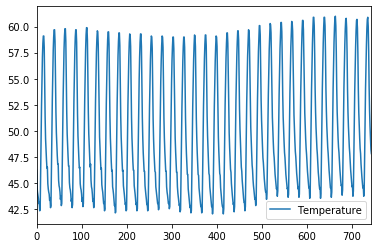

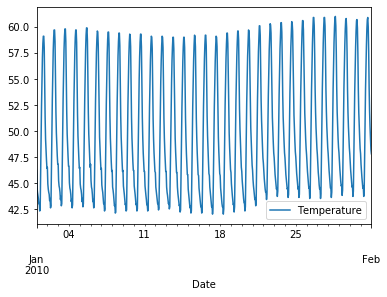

In [44]:
df = pd.read_csv('./Data/weather_data_austin_2010.csv'
                 , usecols= ['Temperature', 'Date'])
df = df.head(745)
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date',inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

### 3.13 Plotting date ranges, partial indexing
Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed `'Date'` column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. After you are done, you can cycle between the two plots by clicking on the 'Previous Plot' and 'Next Plot' buttons.

First, remind yourself how to extract one month of temperature data using `'May 2010'` as a key into `df.Temperature[]`, and call `head()` to inspect the result: `df.Temperature['May 2010'].head()`.

**Instructions**

- Plot the summer temperatures using method chaining. The summer ranges from the months `'2010-Jun'` to `'2010-Aug'`.
- Plot the temperatures for one week in June using the same method chaining, but this time indexing with `'2010-06-10':'2010-06-17'` before you follow up with `.plot()`.

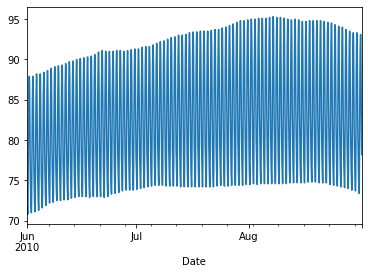

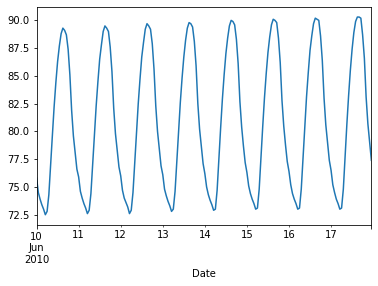

<Figure size 432x288 with 0 Axes>

In [45]:
df = pd.read_csv('./Data/weather_data_austin_2010.csv'
                  , index_col='Date'
                  , parse_dates=True)

# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


## 4. Case Study - Sunlight in Austin

Working with real-world weather and climate data, in this chapter you will bring together and apply all of the skills you have acquired in this course. You will use Pandas to manipulate the data into a form usable for analysis, and then systematically explore it using the techniques you learned in the prior chapters. Enjoy!

### 4.1 What method should we use to read the data?
The first step in our analysis is to read in the data. Upon inspection with a certain system tool, we find that the data appears to be ASCII encoded with comma delimited columns, but has no header and no column labels. Which of the following is the best method to start with to read the data files?

**Possible Answers**
- pd.read_csv()
- **pd.to_csv()**
- pd.read_hdf()
- np.load()


### 4.2 Reading in a data file
Now that you have identified the method to use to read the data, let's try to read one file. The problem with real data such as this is that the files are almost never formatted in a convenient way. In this exercise, there are several problems to overcome in reading the file. First, there is no header, and thus the columns don't have labels. There is also no obvious index column, since none of the data columns contain a full date or time.

Your job is to read the file into a DataFrame using the default arguments. After inspecting it, you will re-read the file specifying that there are no headers supplied.

The CSV file has been provided for you as the variable `data_file`.

**Instructions**

- Import `pandas` as `pd`.
- Read the file `data_file` into a DataFrame called `df`.
- Print the output of `df.head()`. This has been done for you. Notice the formatting problems in `df`.
- Re-read the data using specifying the keyword argument `header=None` and assign it to `df_headers`.
- Print the output of `df_headers.head(`). This has already been done for you. Hit 'Submit Answer' and see how this resolves the formatting issues.

In [46]:
df = pd.read_csv('./Data/NOAA_QCLCD_2011_hourly_13904.txt')
# Import pandas
import pandas as pd

# Read in the data file: df
# data_file = 'NOAA_QCLCD_2011_hourly_13904.txt'
df = pd.read_csv(data_file)

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
      0                 1
0  Year  Total Population
1  1960      3034970564.0
2  1970      3684822701.0
3  1980      4436590356.0
4  1990      5282715991.0


### 4.3 Re-assigning column names
After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

pandas has been imported in the workspace as `pd`, and the file `NOAA_QCLCD_2011_hourly_13904.txt` has been parsed and loaded into a DataFrame `df`. The comma separated string of column names, `column_labels`, and list of columns to drop, `list_to_drop`, have also been loaded for you.

**Instructions**

- Convert the comma separated string `column_labels` to a list of strings using `.split(',')`. Assign the result to `column_labels_list`.
- Reassign `df.columns` using the list of strings `column_labels_list`.
- Call `df.drop()` with `list_to_drop` and `axis='columns'`. Assign the result to `df_dropped`.
- Print `df_dropped.head()` to examine the result. This has already been done for you.

In [47]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']
df = pd.read_csv('./Data/NOAA_QCLCD_2011_hourly_13904.txt', header=None)

In [48]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

### 4.4 Cleaning and tidying datetime data
In order to use the full power of pandas time series, you must construct a `DatetimeIndex`. To do so, it is necessary to clean and transform the date and time columns.

The DataFrame `df_dropped` you created in the last exercise is provided for you and pandas has been imported as `pd`.

Your job is to clean up the `date` and `Time` columns and combine them into a datetime collection to be used as the Index.

**Instructions**

- Convert the `'date'` column to a string with `.astype(str)` and assign to `df_dropped['date']`.
- Add leading zeros to the `'Time'` column. This has been done for you.
- Concatenate the new `'date'` and `'Time'` columns together. Assign to `date_string`.
- Convert the `date_string` Series to datetime values with `pd.to_datetime()`. Specify the `format` parameter.
- Set the index of the `df_dropped` DataFrame to be `date_times`. Assign the result to `df_clean`.

In [49]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

### 4.5 Cleaning the numeric columns
The numeric columns contain missing values labeled as `'M'`. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as `NaN`.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like `'M'` to be interpreted as `NaN`.

A DataFrame `df_clean` is provided for you at the start of the exercise, and as usual, pandas has been imported as `pd`.

**Instructions**

- Print the `'dry_bulb_faren'` temperature between 8 AM and 9 AM on June 20, 2011.
- Convert the `'dry_bulb_faren'` column to numeric values with `pd.to_numeric()`. Specify `errors='coerce'`.
- Print the transformed `dry_bulb_faren` temperature between 8 AM and 9 AM on June 20, 2011.
- Convert the `'wind_speed'` and `'dew_point_faren'` columns to numeric values with `pd.to_numeric()`. Again, specify `errors='coerce'`.

In [50]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-6-20 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-6-20 09:00:00','dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


### 4.6 Signal min, max, median
Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data.

Your job in this exercise is to analyze the `'dry_bulb_faren'` column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection.

The cleaned dataframe is provided in the workspace as `df_clean`.

**Instructions**

- Select the `'dry_bulb_faren'` column and print the output of `.median()`.
- Use `.loc[]` to select the range `'2011-Apr':'2011-Jun'` from `'dry_bulb_faren'` and print the output of `.median()`.
- Use `.loc[]` to select the month `'2011-Jan'` from `'dry_bulb_faren'` and print the output of `.median()`.

In [51]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


### 4.7 Signal variance
You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

The DataFrames `df_clean` and `df_climate` from previous exercises are available in the workspace.

Your job is to first resample `df_clean` and `df_climate` by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - `'dry_bulb_faren'` in `df_clean`, and `'Temperature'` in `df_climate` - as NumPy arrays and compute the difference.

Notice that the indexes of `df_clean` and `df_climate` are not aligned - `df_clean` has dates in 2011, while `df_climate` has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas `.reset_index()` method to make sure the Series align properly. You will practice this approach as well

**Instructions**

- Downsample `df_clean` with daily frequency and aggregate by the mean. Store the result as `daily_mean_2011`.
- Extract the `'dry_bulb_faren'` column from `daily_mean_2011` as a NumPy array using `.values`. Store the result as `daily_temp_2011`. Note: `.values` is an attribute, not a method, so you don't have to use `()`.
- Downsample `df_climate` with daily frequency and aggregate by the mean. Store the result as `daily_climate`.
- Reset the index of `daily_climate` and extract the `Temperature` column. To do this, first reset the index of `daily_climate` using the `.reset_index()` method, and then use bracket slicing to access `'Temperature'`. Store the result as `daily_temp_climate`.

In [56]:
df_climate= pd.read_csv('./Data/weather_data_austin_2010.csv'
                  , index_col='Date'
                  , parse_dates=True)


In [57]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056477


### 4.8 Sunny or cloudy
On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter for sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

The DataFrame `df_clean` from previous exercises has been provided for you. The column `'sky_condition'` provides information about whether the day was sunny (`'CLR'`) or overcast (`'OVC'`).

**Instructions 1/3**

- Get the cases in `df_clean` where the sky is clear. That is, when `'sky_condition'` equals `'CLR'`, assigning to `is_sky_clear`.
- Use `.loc[]` to filter `df_clean` by `is_sky_clear`, assigning to `sunny`.
- Resample `sunny` by day (`'D'`), and take the max to find the maximum daily temperature.

In [59]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


**Instructions 2/3**

- Get the cases in `df_clean` where the sky is overcast. Using `.str.contains()`, find when `'sky_condition'` contains `'OVC'`, assigning to `is_sky_overcast`.
- Use `.loc[]` to filter `df_clean` by `is_sky_overcast`, assigning to `overcast`.
- Resample `overcast` by day (`'D'`), and take the max to find the maximum daily temperature.

In [60]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


**Instructions 3/3**

- Calculate the mean of `sunny_daily_max`, assigning to `sunny_daily_max_mean`.
- Calculate the mean of `overcast_daily_max`, assigning to `overcast_daily_max_mean`.
- Print `sunny_daily_max_mean` minus `overcast_daily_max_mean`. *How much hotter are sunny days?*

In [62]:
# From previous steps
is_sky_clear = df_clean['sky_condition']=='CLR'
sunny = df_clean.loc[is_sky_clear]
sunny_daily_max = sunny.resample('D').max()
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')
overcast = df_clean.loc[is_sky_overcast]
overcast_daily_max = overcast.resample('D').max()

# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


### 4.9 Weekly average temperature and visibility
Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using `.corr()`. The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

The DataFrame `df_clean` has been pre-loaded for you.

**Instructions**

- Import `matplotlib.pyplot` as `plt`.
- Select the `'visibility'` and `'dry_bulb_faren'` columns and resample them by week, aggregating the mean. Assign the result to `weekly_mean`.
- Print the output of `weekly_mean.corr()`.
- Plot the `weekly_mean` dataframe with `.plot()`, specifying `subplots=True`.

                dry_bulb_faren
dry_bulb_faren             1.0


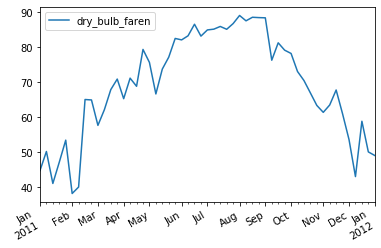

In [63]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

In [86]:
df_clean.visibility.unique()

array(['10.00', ' 9.00', ' 5.00', ' 4.00', ' 2.50', ' 1.50', ' 0.75',
       ' 3.00', ' 2.00', ' 8.00', ' 6.00', ' 7.00', ' 0.50', ' 1.25',
       ' 1.00', ' 1.75', ' 0.25', nan, ' 0.12', ' 0.00', 'M'],
      dtype=object)

### 4.10 Daily hours of clear sky
In a previous exercise, you analyzed the `'sky_condition'` column to explore the difference in temperature on sunny days compared to overcast days. Recall that a '`sky_condition'` of `'CLR'` represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The `'sky_condition'` column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

As before, `df_clean` is available for you in the workspace.

**Instructions 1/3**

- Get the cases in `df_clean` where the sky is clear. That is, when `'sky_condition'` equals `'CLR'`, assigning the result to `is_sky_clear`.
- Resample `is_sky_clear` by day, assigning to `resampled`.

In [89]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

**Instructions 2/3**

- Calculate the number of measured sunny hours per day as the sum of `resampled`, assigning to `sunny_hours`.
- Calculate the total number of measured hours per day as the count of `resampled`, assigning to `total_hours`.
- Calculate the fraction of hours per day that were sunny as the ratio of sunny hours to total hours.

In [90]:
# From previous step
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

**Instructions 3/3**

- Draw a box plot of sunny_fraction using .plot() with kind set to 'box'.

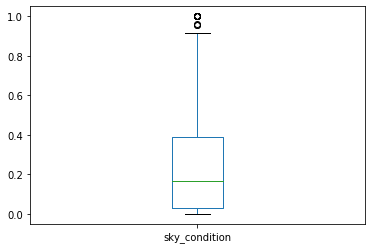

In [91]:
# From previous steps
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')
sunny_hours = resampled.sum()
total_hours = resampled.count()
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### 4.11 Heat or humidity
Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are `'dew_point_faren'` and `'dry_bulb_faren'`. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month!

df_clean has been pre-loaded for you.

**Instructions**

- Select the `'dew_point_faren'` and `'dry_bulb_faren'` columns (in that order). Resample by month and aggregate the maximum monthly temperatures. Assign the result to `monthly_max`.
- Plot a histogram of the resampled data with `bins=8`, `alpha=0.5`, and `subplots=True`.

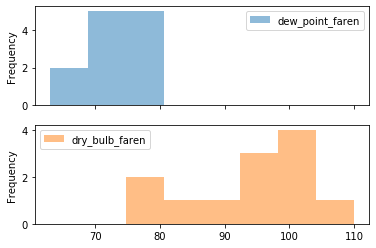

In [93]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist',bins=8,alpha=0.5,subplots=True)

# Show the plot
plt.show()

### 4.12 Probability of high temperatures
We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage the data manipulation, filtering, resampling, and visualization skills you have acquired throughout this course.

The two DataFrames `df_clean` and `df_climate` are available in the workspace. Your job is to select the maximum temperature in August in `df_climate`, and then maximum daily temperatures in August 2011. You will then filter to keep only the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

Once you've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

**Instructions**

- From `df_climate`, extract the maximum temperature observed in August 2010. The relevant column here is `'Temperature'`. You can select the rows corresponding to August 2010 in multiple ways. For example, `df_climate.loc['2011-Feb']` selects all rows corresponding to February 2011, while `df_climate.loc['2009-09', 'Pressure']` selects the rows corresponding to September 2009 from the `'Pressure'` column.
- From `df_clean`, select the August 2011 temperature data from the `'dry_bulb_faren'`. Resample this data by day and aggregate the maximum value. Store the result in august_2011.
- Filter rows of `august_2011` to keep days where the value exceeded `august_max`. Store the result in `august_2011_high`.
- Construct a CDF of `august_2011_high` using 25 bins. Remember to specify the `kind`, `normed`, and `cumulative` parameters in addition to `bins`.

95.3


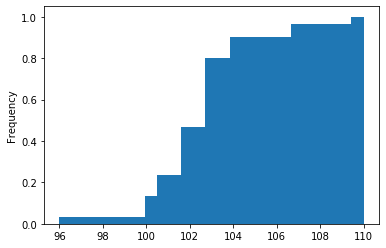

In [95]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()


# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high =  august_2011.loc[august_2011 > august_max]


# Construct a CDF of august_2011_high
#august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25)
august_2011_high.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()